<a href="https://colab.research.google.com/github/XiaoLiang28/Xiao/blob/main/Final_Project_Last_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

#Set up

In [1]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter 
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now: 
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl                                                 

from google.colab import files

#import webbrowser                                                                                                           

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections]) 

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib 
#%matplotlib --list 
#interactive plots:
#%matplotlib notebook  
#static images of your plot:
%matplotlib inline 
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;) 
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

#Dataset Import and Management

##1. Human Development Index (HDI)

In [8]:
hd=pd.read_excel("https://github.com/XiaoLiang28/Xiao/blob/main/Human%20Development%20Index(1).xlsx?raw=true")

In [9]:
hd.drop(['Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9', 'Unnamed: 11'],axis=1, inplace=True)

In [10]:
hd = hd.rename(columns={'Human Development Index (HDI) ': 'Human Development Index (HDI)'})
hd = hd.rename(columns={'Country ': 'Country'})

In [11]:
hd

,HDI Rank,Country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,Human Development
0,1,Switzerland,0.962,83.9872,16.500299,13.859660,66933.004540,Very High
1,2,Norway,0.961,83.2339,18.185200,13.003630,64660.106220,Very High
2,3,Iceland,0.959,82.6782,19.163059,13.767170,55782.049810,Very High
3,4,"Hong Kong, China (SAR)",0.952,85.4734,17.278170,12.226210,62606.845400,Very High
4,5,Australia,0.951,84.5265,21.054590,12.726820,49238.433350,Very High
...,...,...,...,...,...,...,...,...
186,187,Burundi,0.426,61.6627,10.722722,3.129267,731.786709,Low
187,188,Central African Republic,0.404,53.8947,8.040172,4.334000,966.058611,Low
188,189,Niger,0.400,61.5763,6.957112,2.116717,1239.866936,Low
189,190,Chad,0.394,52.5254,8.035914,2.573774,1364.169417,Low


##2. Gender Inequality Index (GII)

In [12]:
gi=pd.read_excel("https://github.com/XiaoLiang28/Xiao/blob/main/Gender%20Inequality%20Index(1).xlsx?raw=true")

In [13]:
gi=gi[6:197]

In [14]:
gi.rename(columns={'Unnamed: 0':'HDI rank'},inplace=True)
gi.rename(columns={'Unnamed: 1':'country'},inplace=True)
gi.rename(columns={'Unnamed: 2':'GII Value'},inplace=True)
gi.rename(columns={'Unnamed: 6':'Maternal mortality ratio'},inplace=True)
gi.rename(columns={'Unnamed: 8':'Adolescent birth rate'},inplace=True)
gi.rename(columns={'Unnamed: 10':'Share of seats in parliament'},inplace=True)
gi.rename(columns={'Unnamed: 12':'Population with at least some secondary education female'},inplace=True)
gi.rename(columns={'Unnamed: 14':'Population with at least some secondary education male'},inplace=True)
gi.rename(columns={'Unnamed: 16':'Labour force participation rate female'},inplace=True)
gi.rename(columns={'Unnamed: 18':'Labour force participation rate male'},inplace=True)
gi.rename(columns={'Unnamed: 20':'Human Development'},inplace=True)

In [15]:
gi = gi.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9', 'Unnamed: 11', 'Unnamed: 13', 'Unnamed: 15', 'Unnamed: 17', 'Unnamed: 19'], axis=1)

In [17]:
gi1 = gi.replace('..', np.nan)

In [21]:
gi1.rename(columns={'country':'Country'},inplace=True)

In [22]:
gi1

,HDI rank,Country,GII Value,Maternal mortality ratio,Adolescent birth rate,Share of seats in parliament,Population with at least some secondary education female,Population with at least some secondary education male,Labour force participation rate female,Labour force participation rate male,Human Development
6,1,Switzerland,0.018,5.0,2.212,39.837398,96.858673,97.533417,61.728,72.705,Very High
7,2,Norway,0.016,2.0,2.336,44.970414,99.094223,99.283562,60.294,71.950,Very High
8,3,Iceland,0.043,4.0,5.395,47.619048,99.768417,99.662552,61.671,70.463,Very High
9,4,"Hong Kong, China (SAR)",NaN,NaN,1.584,NaN,77.100433,83.368141,53.524,65.771,Very High
10,5,Australia,0.073,6.0,8.096,37.885463,94.580063,94.430069,61.057,70.547,Very High
...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.505,548.0,53.621,38.888889,7.799910,13.046886,78.991,77.379,Low
193,188,Central African Republic,0.672,829.0,160.507,12.857143,13.940000,31.560000,63.312,79.486,Low
194,189,Niger,0.611,509.0,170.462,25.903614,9.163242,15.232771,61.730,84.267,Low
195,190,Chad,0.652,1140.0,138.306,32.258065,7.739064,24.369996,46.914,69.927,Low


##3. Gender Development Index(GDI)

In [56]:
gd=pd.read_excel("https://github.com/XiaoLiang28/Xiao/blob/main/Gender%20Development%20Index(2).xlsx?raw=true")

In [58]:
gd=gd[6:197]

In [59]:
gd

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
6,1,Switzerland,0.967,NaN,2,NaN,0.943709,NaN,0.975611,NaN,85.8959,NaN,81.9952,NaN,16.40519,NaN,16.593439,NaN,13.48301,NaN,14.24829,NaN,54596.873938,NaN,79450.51016,NaN,Very High
7,2,Norway,0.983,NaN,1,NaN,0.9499,NaN,0.966061,NaN,84.8787,NaN,81.5622,NaN,18.886789,NaN,17.52533,NaN,13.13508,NaN,12.87032,NaN,54699.445557,NaN,74444.990916,NaN,Very High
8,3,Iceland,0.976,NaN,1,NaN,0.946936,NaN,0.970604,NaN,84.1804,NaN,81.2138,NaN,20.27153,NaN,18.090469,NaN,13.86953,NaN,13.67178,NaN,47135.914239,NaN,64004.128579,NaN,Very High
9,4,"Hong Kong, China (SAR)",0.976,NaN,1,NaN,0.941078,NaN,0.964311,NaN,88.3257,NaN,82.6613,NaN,17.572201,NaN,17.033239,NaN,11.8457,NaN,12.70688,NaN,51735.256517,NaN,75306.957306,NaN,Very High
10,5,Australia,0.968,NaN,2,NaN,0.931672,NaN,0.962956,NaN,85.8396,NaN,83.1718,NaN,21.817579,NaN,20.30188,NaN,12.81059,NaN,12.63971,NaN,37485.5883,NaN,61160.790107,NaN,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.935,NaN,3,NaN,0.412236,NaN,0.440935,NaN,63.6092,NaN,59.7112,NaN,10.915472,NaN,10.535239,NaN,2.491789,NaN,3.851801,NaN,667.520768,NaN,796.956456,NaN,Low
193,188,Central African Republic,0.81,NaN,5,NaN,0.359111,NaN,0.443254,NaN,56.3035,NaN,51.6455,NaN,6.66856,NaN,9.393839,NaN,3.108,NaN,5.594,NaN,769.842841,NaN,1162.317208,NaN,Low
194,189,Niger,0.835,NaN,5,NaN,0.364315,NaN,0.436371,NaN,62.7943,NaN,60.4065,NaN,6.260139,NaN,7.638221,NaN,1.708292,NaN,2.789488,NaN,936.484843,NaN,1534.591089,NaN,Low
195,190,Chad,0.77,NaN,5,NaN,0.339312,NaN,0.440889,NaN,54.2828,NaN,50.8449,NaN,6.611644,NaN,9.464517,NaN,1.489174,NaN,3.681625,NaN,965.151078,NaN,1760.0728,NaN,Low


In [60]:
gd = gd.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9', 'Unnamed: 11', 'Unnamed: 13', 'Unnamed: 15', 'Unnamed: 17', 'Unnamed: 19', 'Unnamed: 21', 'Unnamed: 23', 'Unnamed: 25'], axis=1)

In [63]:
gd

,HDI Rank,Unnamed: 1,Unnamed: 2,Unnamed: 6,Unnamed: 8,Unnamed: 10,Unnamed: 12,Unnamed: 14,Unnamed: 16,Unnamed: 18,Unnamed: 20,Unnamed: 22,Unnamed: 24,Unnamed: 26
6,1,Switzerland,0.967,0.943709,0.975611,85.8959,81.9952,16.40519,16.593439,13.48301,14.24829,54596.873938,79450.51016,Very High
7,2,Norway,0.983,0.9499,0.966061,84.8787,81.5622,18.886789,17.52533,13.13508,12.87032,54699.445557,74444.990916,Very High
8,3,Iceland,0.976,0.946936,0.970604,84.1804,81.2138,20.27153,18.090469,13.86953,13.67178,47135.914239,64004.128579,Very High
9,4,"Hong Kong, China (SAR)",0.976,0.941078,0.964311,88.3257,82.6613,17.572201,17.033239,11.8457,12.70688,51735.256517,75306.957306,Very High
10,5,Australia,0.968,0.931672,0.962956,85.8396,83.1718,21.817579,20.30188,12.81059,12.63971,37485.5883,61160.790107,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.935,0.412236,0.440935,63.6092,59.7112,10.915472,10.535239,2.491789,3.851801,667.520768,796.956456,Low
193,188,Central African Republic,0.81,0.359111,0.443254,56.3035,51.6455,6.66856,9.393839,3.108,5.594,769.842841,1162.317208,Low
194,189,Niger,0.835,0.364315,0.436371,62.7943,60.4065,6.260139,7.638221,1.708292,2.789488,936.484843,1534.591089,Low
195,190,Chad,0.77,0.339312,0.440889,54.2828,50.8449,6.611644,9.464517,1.489174,3.681625,965.151078,1760.0728,Low


In [61]:
gd.rename(columns={gd.columns[0]:"HDI Rank"}, inplace = True)

In [64]:
gd.rename(columns={gd.columns[1]:"Countey",gd.columns[2]:"Gender Development Index",gd.columns[3]:"HDI_F",gd.columns[4]:"HDI_M",gd.columns[5]:"Life Expectancy_F",gd.columns[6]:"Life Expectancy_M",gd.columns[7]:"Expected Schooling_F",gd.columns[8]:"Excepted Schooling_M",gd.columns[9]:"Mean Schooling_F",gd.columns[10]:"Mean Schooling_M",gd.columns[11]:"GNI Female",gd.columns[12]:"GNI Male"}, inplace = True)

In [65]:
gd

,HDI Rank,Countey,Gender Development Index,HDI_F,HDI_M,Life Expectancy_F,Life Expectancy_M,Expected Schooling_F,Excepted Schooling_M,Mean Schooling_F,Mean Schooling_M,GNI Female,GNI Male,Unnamed: 26
6,1,Switzerland,0.967,0.943709,0.975611,85.8959,81.9952,16.40519,16.593439,13.48301,14.24829,54596.873938,79450.51016,Very High
7,2,Norway,0.983,0.9499,0.966061,84.8787,81.5622,18.886789,17.52533,13.13508,12.87032,54699.445557,74444.990916,Very High
8,3,Iceland,0.976,0.946936,0.970604,84.1804,81.2138,20.27153,18.090469,13.86953,13.67178,47135.914239,64004.128579,Very High
9,4,"Hong Kong, China (SAR)",0.976,0.941078,0.964311,88.3257,82.6613,17.572201,17.033239,11.8457,12.70688,51735.256517,75306.957306,Very High
10,5,Australia,0.968,0.931672,0.962956,85.8396,83.1718,21.817579,20.30188,12.81059,12.63971,37485.5883,61160.790107,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.935,0.412236,0.440935,63.6092,59.7112,10.915472,10.535239,2.491789,3.851801,667.520768,796.956456,Low
193,188,Central African Republic,0.81,0.359111,0.443254,56.3035,51.6455,6.66856,9.393839,3.108,5.594,769.842841,1162.317208,Low
194,189,Niger,0.835,0.364315,0.436371,62.7943,60.4065,6.260139,7.638221,1.708292,2.789488,936.484843,1534.591089,Low
195,190,Chad,0.77,0.339312,0.440889,54.2828,50.8449,6.611644,9.464517,1.489174,3.681625,965.151078,1760.0728,Low


In [66]:
gd.rename(columns={gd.columns[13]:"Human Development"}, inplace = True)

In [67]:
gd

,HDI Rank,Countey,Gender Development Index,HDI_F,HDI_M,Life Expectancy_F,Life Expectancy_M,Expected Schooling_F,Excepted Schooling_M,Mean Schooling_F,Mean Schooling_M,GNI Female,GNI Male,Human Development
6,1,Switzerland,0.967,0.943709,0.975611,85.8959,81.9952,16.40519,16.593439,13.48301,14.24829,54596.873938,79450.51016,Very High
7,2,Norway,0.983,0.9499,0.966061,84.8787,81.5622,18.886789,17.52533,13.13508,12.87032,54699.445557,74444.990916,Very High
8,3,Iceland,0.976,0.946936,0.970604,84.1804,81.2138,20.27153,18.090469,13.86953,13.67178,47135.914239,64004.128579,Very High
9,4,"Hong Kong, China (SAR)",0.976,0.941078,0.964311,88.3257,82.6613,17.572201,17.033239,11.8457,12.70688,51735.256517,75306.957306,Very High
10,5,Australia,0.968,0.931672,0.962956,85.8396,83.1718,21.817579,20.30188,12.81059,12.63971,37485.5883,61160.790107,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.935,0.412236,0.440935,63.6092,59.7112,10.915472,10.535239,2.491789,3.851801,667.520768,796.956456,Low
193,188,Central African Republic,0.81,0.359111,0.443254,56.3035,51.6455,6.66856,9.393839,3.108,5.594,769.842841,1162.317208,Low
194,189,Niger,0.835,0.364315,0.436371,62.7943,60.4065,6.260139,7.638221,1.708292,2.789488,936.484843,1534.591089,Low
195,190,Chad,0.77,0.339312,0.440889,54.2828,50.8449,6.611644,9.464517,1.489174,3.681625,965.151078,1760.0728,Low


In [68]:
gd = gd.replace('..', np.nan)

In [70]:
gd.rename(columns={gd.columns[1]:"Country"}, inplace = True)

In [72]:
gd

,HDI Rank,Country,Gender Development Index,HDI_F,HDI_M,Life Expectancy_F,Life Expectancy_M,Expected Schooling_F,Excepted Schooling_M,Mean Schooling_F,Mean Schooling_M,GNI Female,GNI Male,Human Development
6,1,Switzerland,0.967,0.943709,0.975611,85.8959,81.9952,16.405190,16.593439,13.483010,14.248290,54596.873938,79450.510160,Very High
7,2,Norway,0.983,0.949900,0.966061,84.8787,81.5622,18.886789,17.525330,13.135080,12.870320,54699.445557,74444.990916,Very High
8,3,Iceland,0.976,0.946936,0.970604,84.1804,81.2138,20.271530,18.090469,13.869530,13.671780,47135.914239,64004.128579,Very High
9,4,"Hong Kong, China (SAR)",0.976,0.941078,0.964311,88.3257,82.6613,17.572201,17.033239,11.845700,12.706880,51735.256517,75306.957306,Very High
10,5,Australia,0.968,0.931672,0.962956,85.8396,83.1718,21.817579,20.301880,12.810590,12.639710,37485.588300,61160.790107,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.935,0.412236,0.440935,63.6092,59.7112,10.915472,10.535239,2.491789,3.851801,667.520768,796.956456,Low
193,188,Central African Republic,0.810,0.359111,0.443254,56.3035,51.6455,6.668560,9.393839,3.108000,5.594000,769.842841,1162.317208,Low
194,189,Niger,0.835,0.364315,0.436371,62.7943,60.4065,6.260139,7.638221,1.708292,2.789488,936.484843,1534.591089,Low
195,190,Chad,0.770,0.339312,0.440889,54.2828,50.8449,6.611644,9.464517,1.489174,3.681625,965.151078,1760.072800,Low


In [73]:
gd.columns

Index(['HDI Rank', 'Country', 'Gender Development Index', 'HDI_F', 'HDI_M',
       'Life Expectancy_F', 'Life Expectancy_M', 'Expected Schooling_F',
       'Excepted Schooling_M', 'Mean Schooling_F', 'Mean Schooling_M',
       'GNI Female', 'GNI Male', 'Human Development'],
      dtype='object')

#Maps and Graphs

General global condition of HDI, GII, and GDI

In [34]:
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [35]:
! pip install geopandas 
!pip install mapclassify
import geopandas as gpd 
import mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 31.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
! wget -q -O world-countries.zip "https://github.com/XiaoLiang28/Xiao/blob/main/World_Countries_(Generalized).zip?raw=true"
zip_ref = zipfile.ZipFile('world-countries.zip', 'r'); zip_ref.extractall(); zip_ref.close()
world=gpd.read_file('World_Countries__Generalized_.shp')

<Axes: >

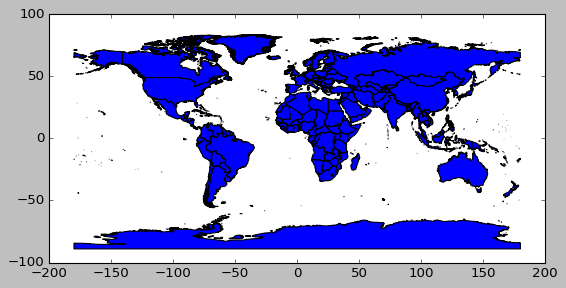

In [37]:
world.plot()

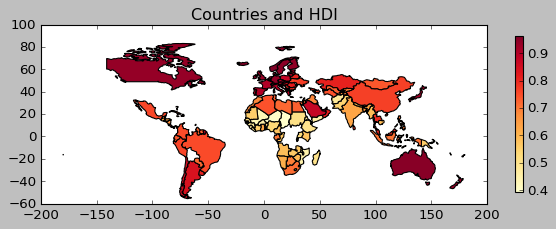

In [38]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged2 = world.merge(hd, left_on='name', right_on='Country', how='left')

merged2= merged2.reset_index()
fig, ax = plt.subplots(figsize=(9, 9))
merged2.plot(column='Human Development Index (HDI)', cmap='YlOrRd',legend_kwds={
        "shrink":.27}, ax=ax,  legend=True)
ax.set_title('Countries and HDI');

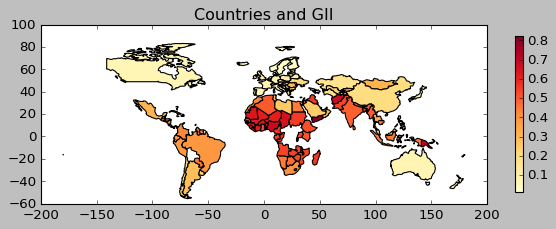

In [41]:
world2 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged3 = world.merge(gi1, left_on='name', right_on='Country', how='left')

merged3= merged3.reset_index()
fig, ax = plt.subplots(figsize=(9, 9))
merged3.plot(column='GII Value', cmap='YlOrRd',legend_kwds={
        "shrink":.27}, ax=ax,  legend=True)
ax.set_title('Countries and GII');

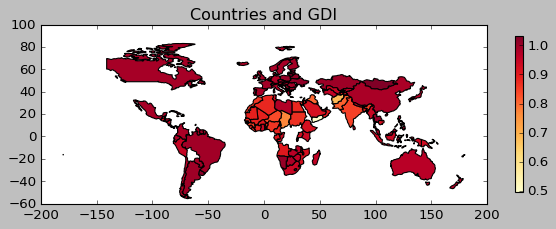

In [74]:
world3 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged4 = world.merge(gd, left_on='name', right_on='Country', how='left')

merged4= merged4.reset_index()
fig, ax = plt.subplots(figsize=(9, 9))
merged4.plot(column='Gender Development Index', cmap='YlOrRd',legend_kwds={
        "shrink":.27}, ax=ax,  legend=True)
ax.set_title('Countries and GDI');

What is the relationship between HDI and its influencing factors?

Text(54.9752, 0.385, 'South Sudan')

Text(77.1982, 0.921, 'United States')

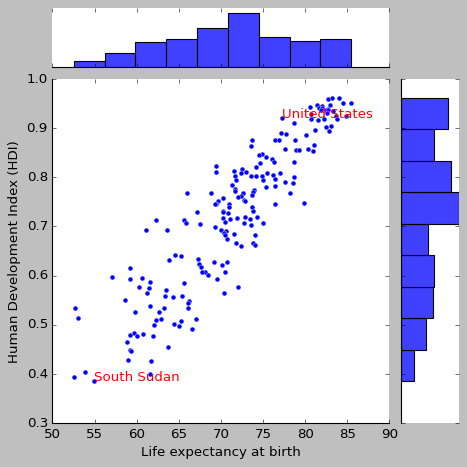

In [110]:
sns.jointplot(x ='Life expectancy at birth', y ='Human Development Index (HDI)', data = hd)
plt.text(54.9752,0.385,'South Sudan',color='red')
plt.text(77.1982,0.921,'United States',color='red')

Text(146829.7006, 0.935, 'Liechtenstein')

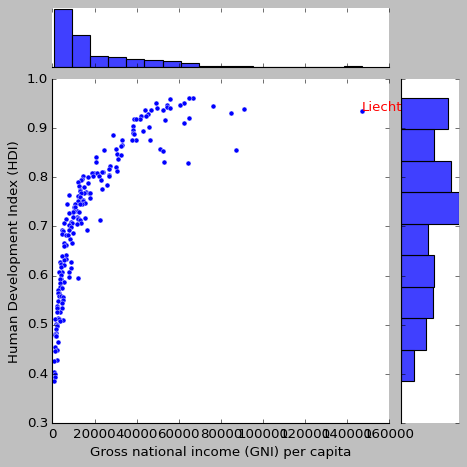

In [112]:
sns.jointplot(x ='Gross national income (GNI) per capita', y ='Human Development Index (HDI)', data = hd)
plt.text(146829.7006,0.935,'Liechtenstein',color='red')

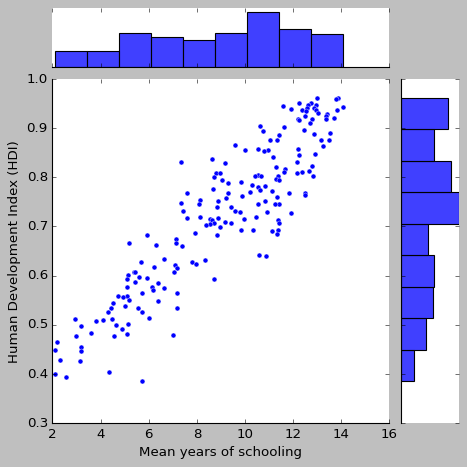

In [77]:
sns.jointplot(x ='Mean years of schooling', y ='Human Development Index (HDI)', data = hd)

Text(21.05459023, 0.951, 'Australia')

Text(20.28388977, 0.937, 'New Zealand')

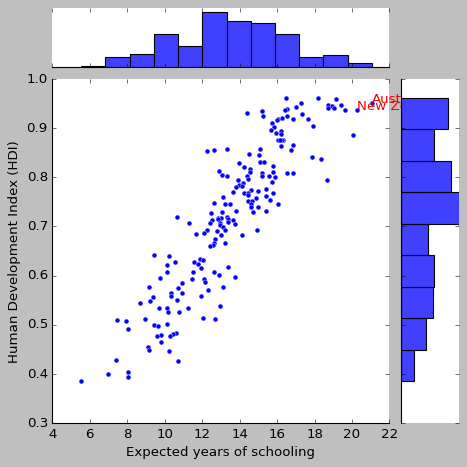

In [113]:
sns.jointplot(x ='Expected years of schooling', y ='Human Development Index (HDI)', data = hd)
plt.text(21.05459023,0.951,'Australia',color='red')
plt.text(20.28388977,0.937,'New Zealand',color='red')

<ipython-input-80-8b13b6d3afa3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = hd.corr()


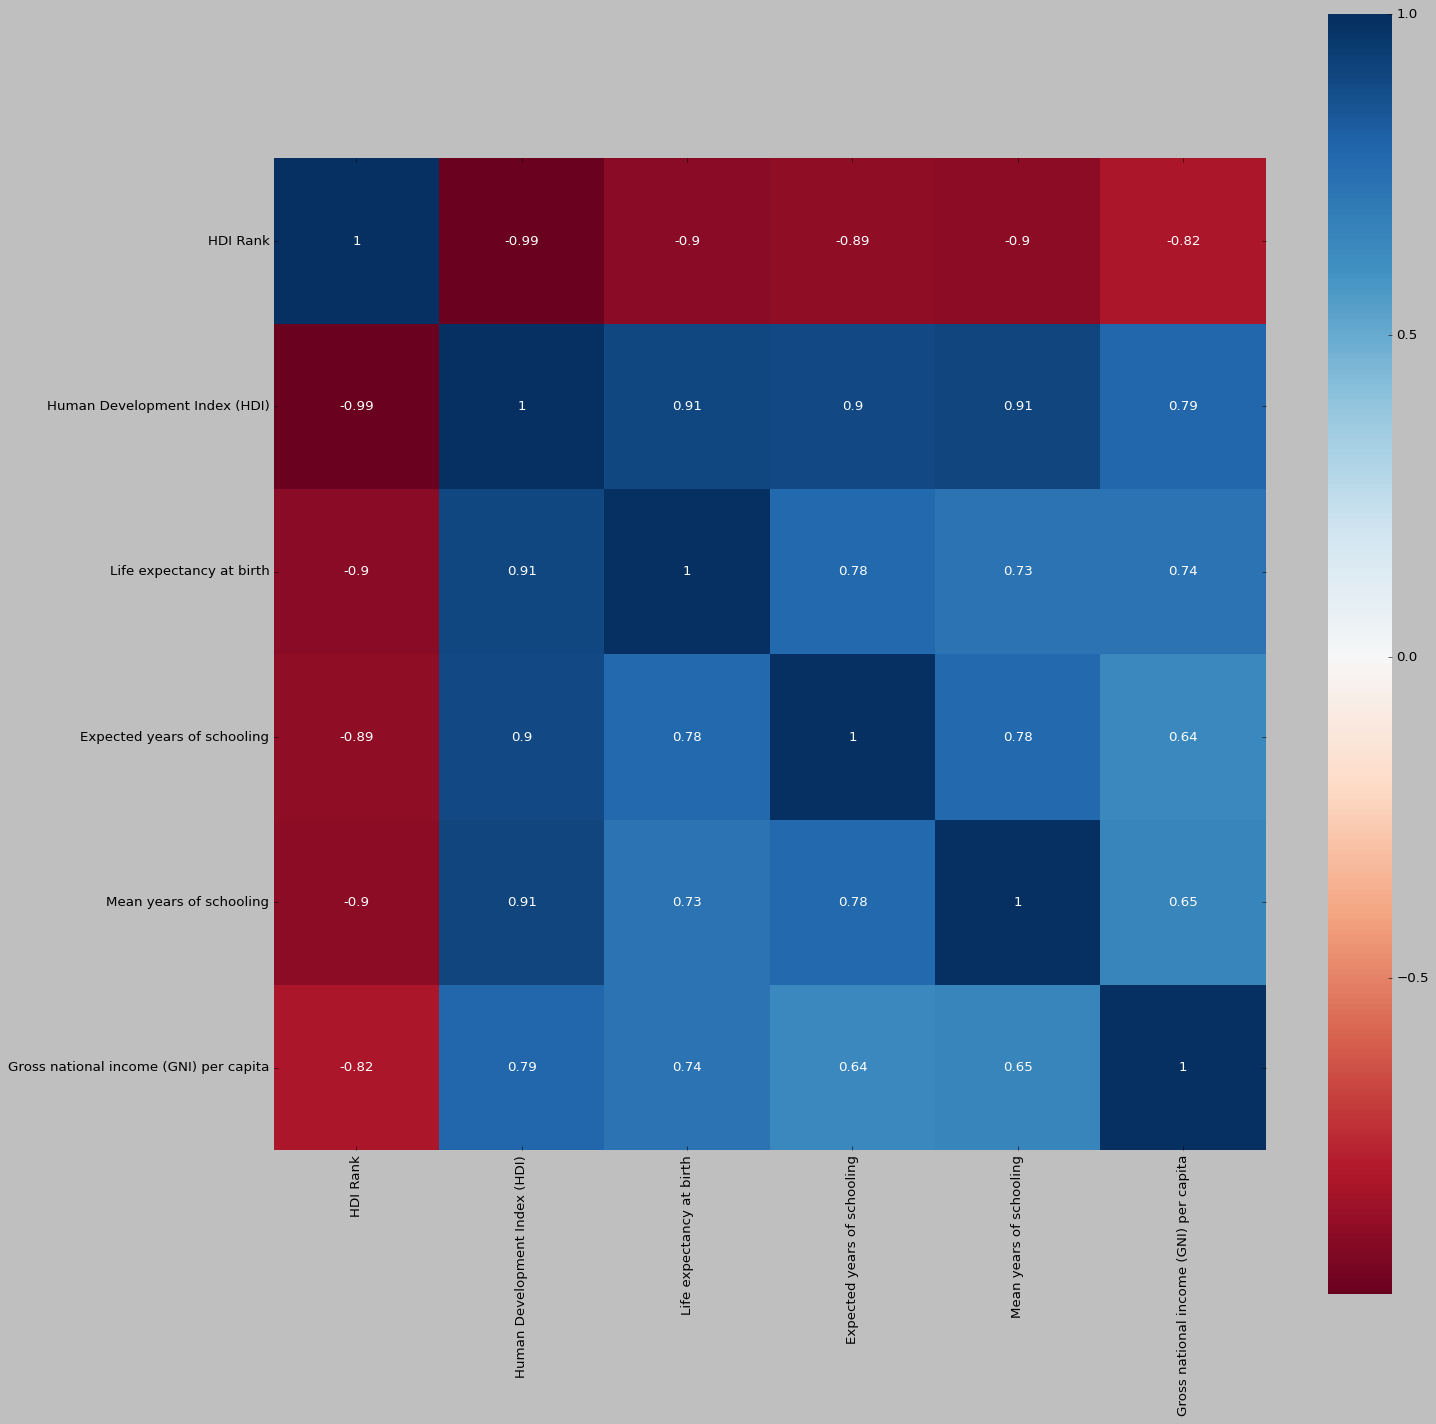

In [80]:
import seaborn as sns

corrmat = hd.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(corrmat, cmap = "RdBu", square = True, annot = True, center = 0);

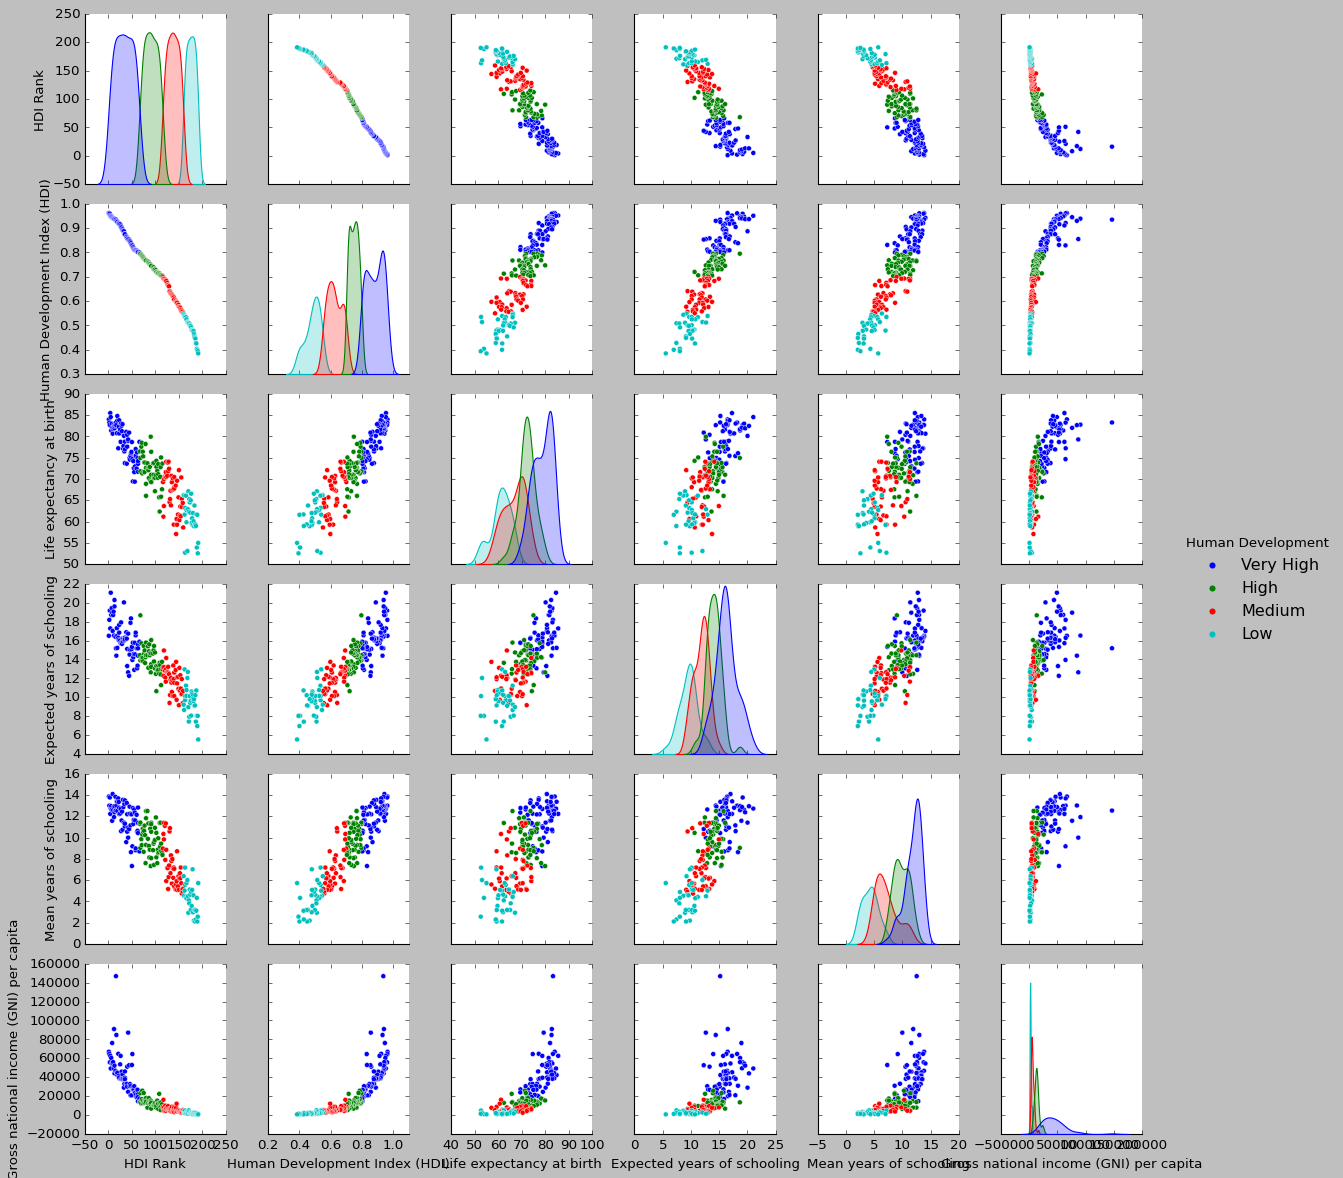

In [81]:
sns.pairplot(hd,hue='Human Development')

From GII, I want to explore more about the gap between male and female.

<Axes: xlabel='GII Value', ylabel='HDI rank'>

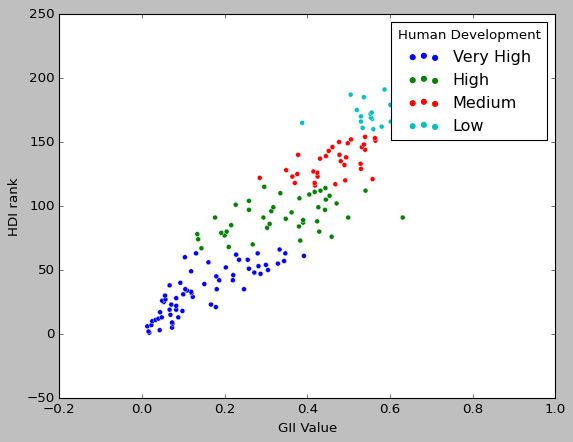

In [83]:
sns.scatterplot(data=gi1,x='GII Value',y='HDI rank',hue='Human Development')

<Axes: xlabel='Population with at least some secondary education female', ylabel='Population with at least some secondary education male'>

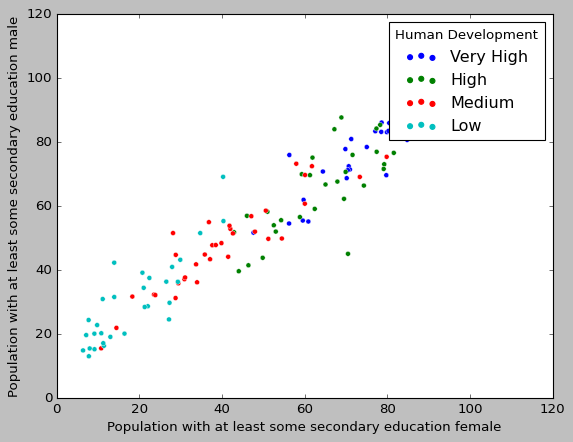

In [84]:
sns.scatterplot(data=gi1,x='Population with at least some secondary education female',y='Population with at least some secondary education male',hue='Human Development')

<Axes: xlabel='Labour force participation rate female', ylabel='Labour force participation rate male'>

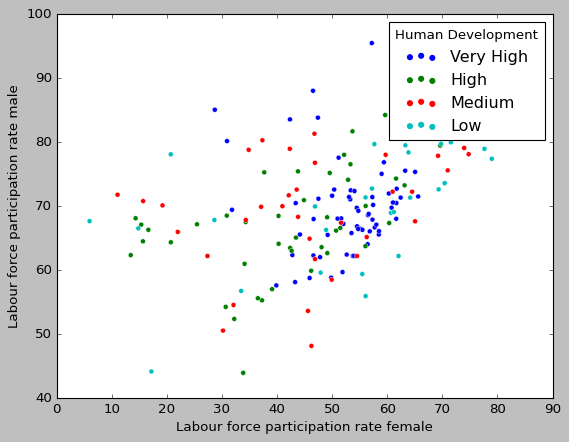

In [85]:
sns.scatterplot(data=gi1,x='Labour force participation rate female',y='Labour force participation rate male',hue='Human Development')

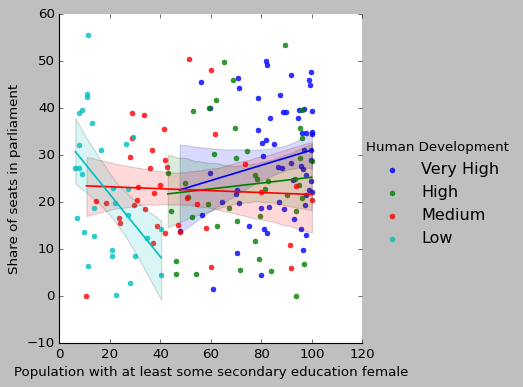

In [86]:
sns.lmplot(data=gi1,x='Population with at least some secondary education female',y='Share of seats in parliament',hue='Human Development')

<Axes: xlabel='Population with at least some secondary education female', ylabel='Adolescent birth rate'>

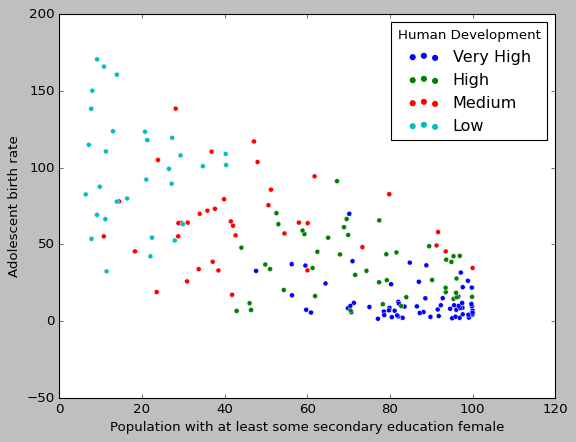

In [87]:
sns.scatterplot(data=gi1,x='Population with at least some secondary education female',y='Adolescent birth rate',hue='Human Development')

<Axes: xlabel='Population with at least some secondary education male', ylabel='Adolescent birth rate'>

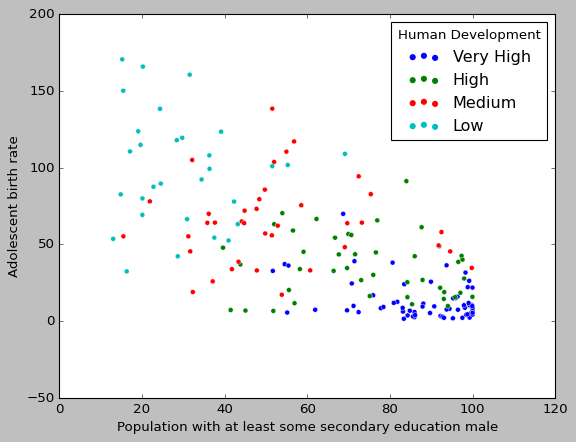

In [88]:
sns.scatterplot(data=gi1,x='Population with at least some secondary education male',y='Adolescent birth rate',hue='Human Development')

<Axes: xlabel='Maternal mortality ratio', ylabel='Adolescent birth rate'>

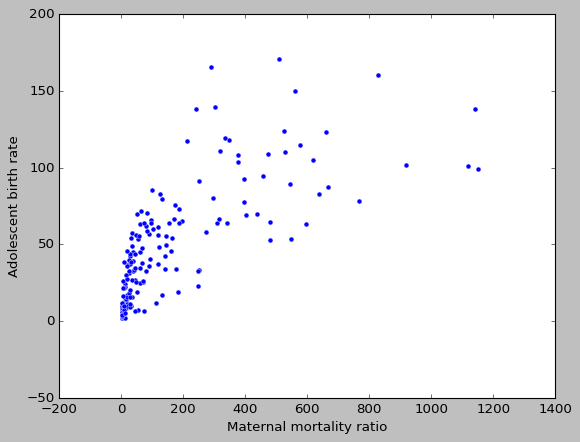

In [89]:
sns.scatterplot(data=gi1,x='Maternal mortality ratio',y='Adolescent birth rate')

<Axes: xlabel='Human Development', ylabel='Adolescent birth rate'>

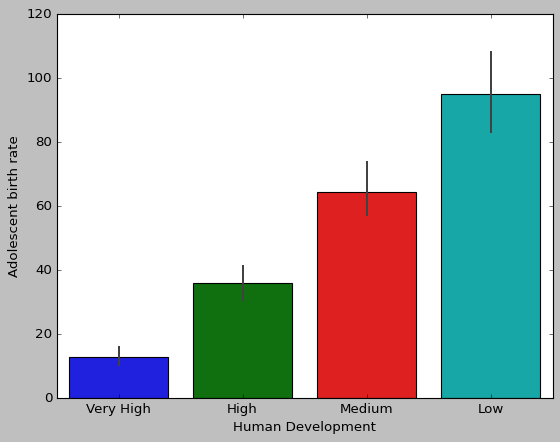

In [90]:
sns.barplot(data=gi1,x='Human Development',y='Adolescent birth rate')

<Axes: xlabel='Human Development', ylabel='Share of seats in parliament'>

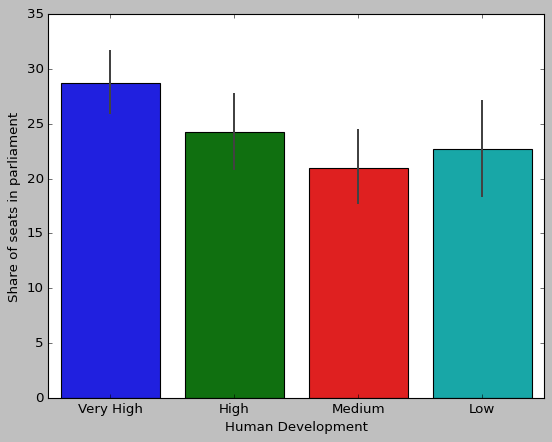

In [91]:
sns.barplot(data=gi1,x='Human Development',y='Share of seats in parliament')

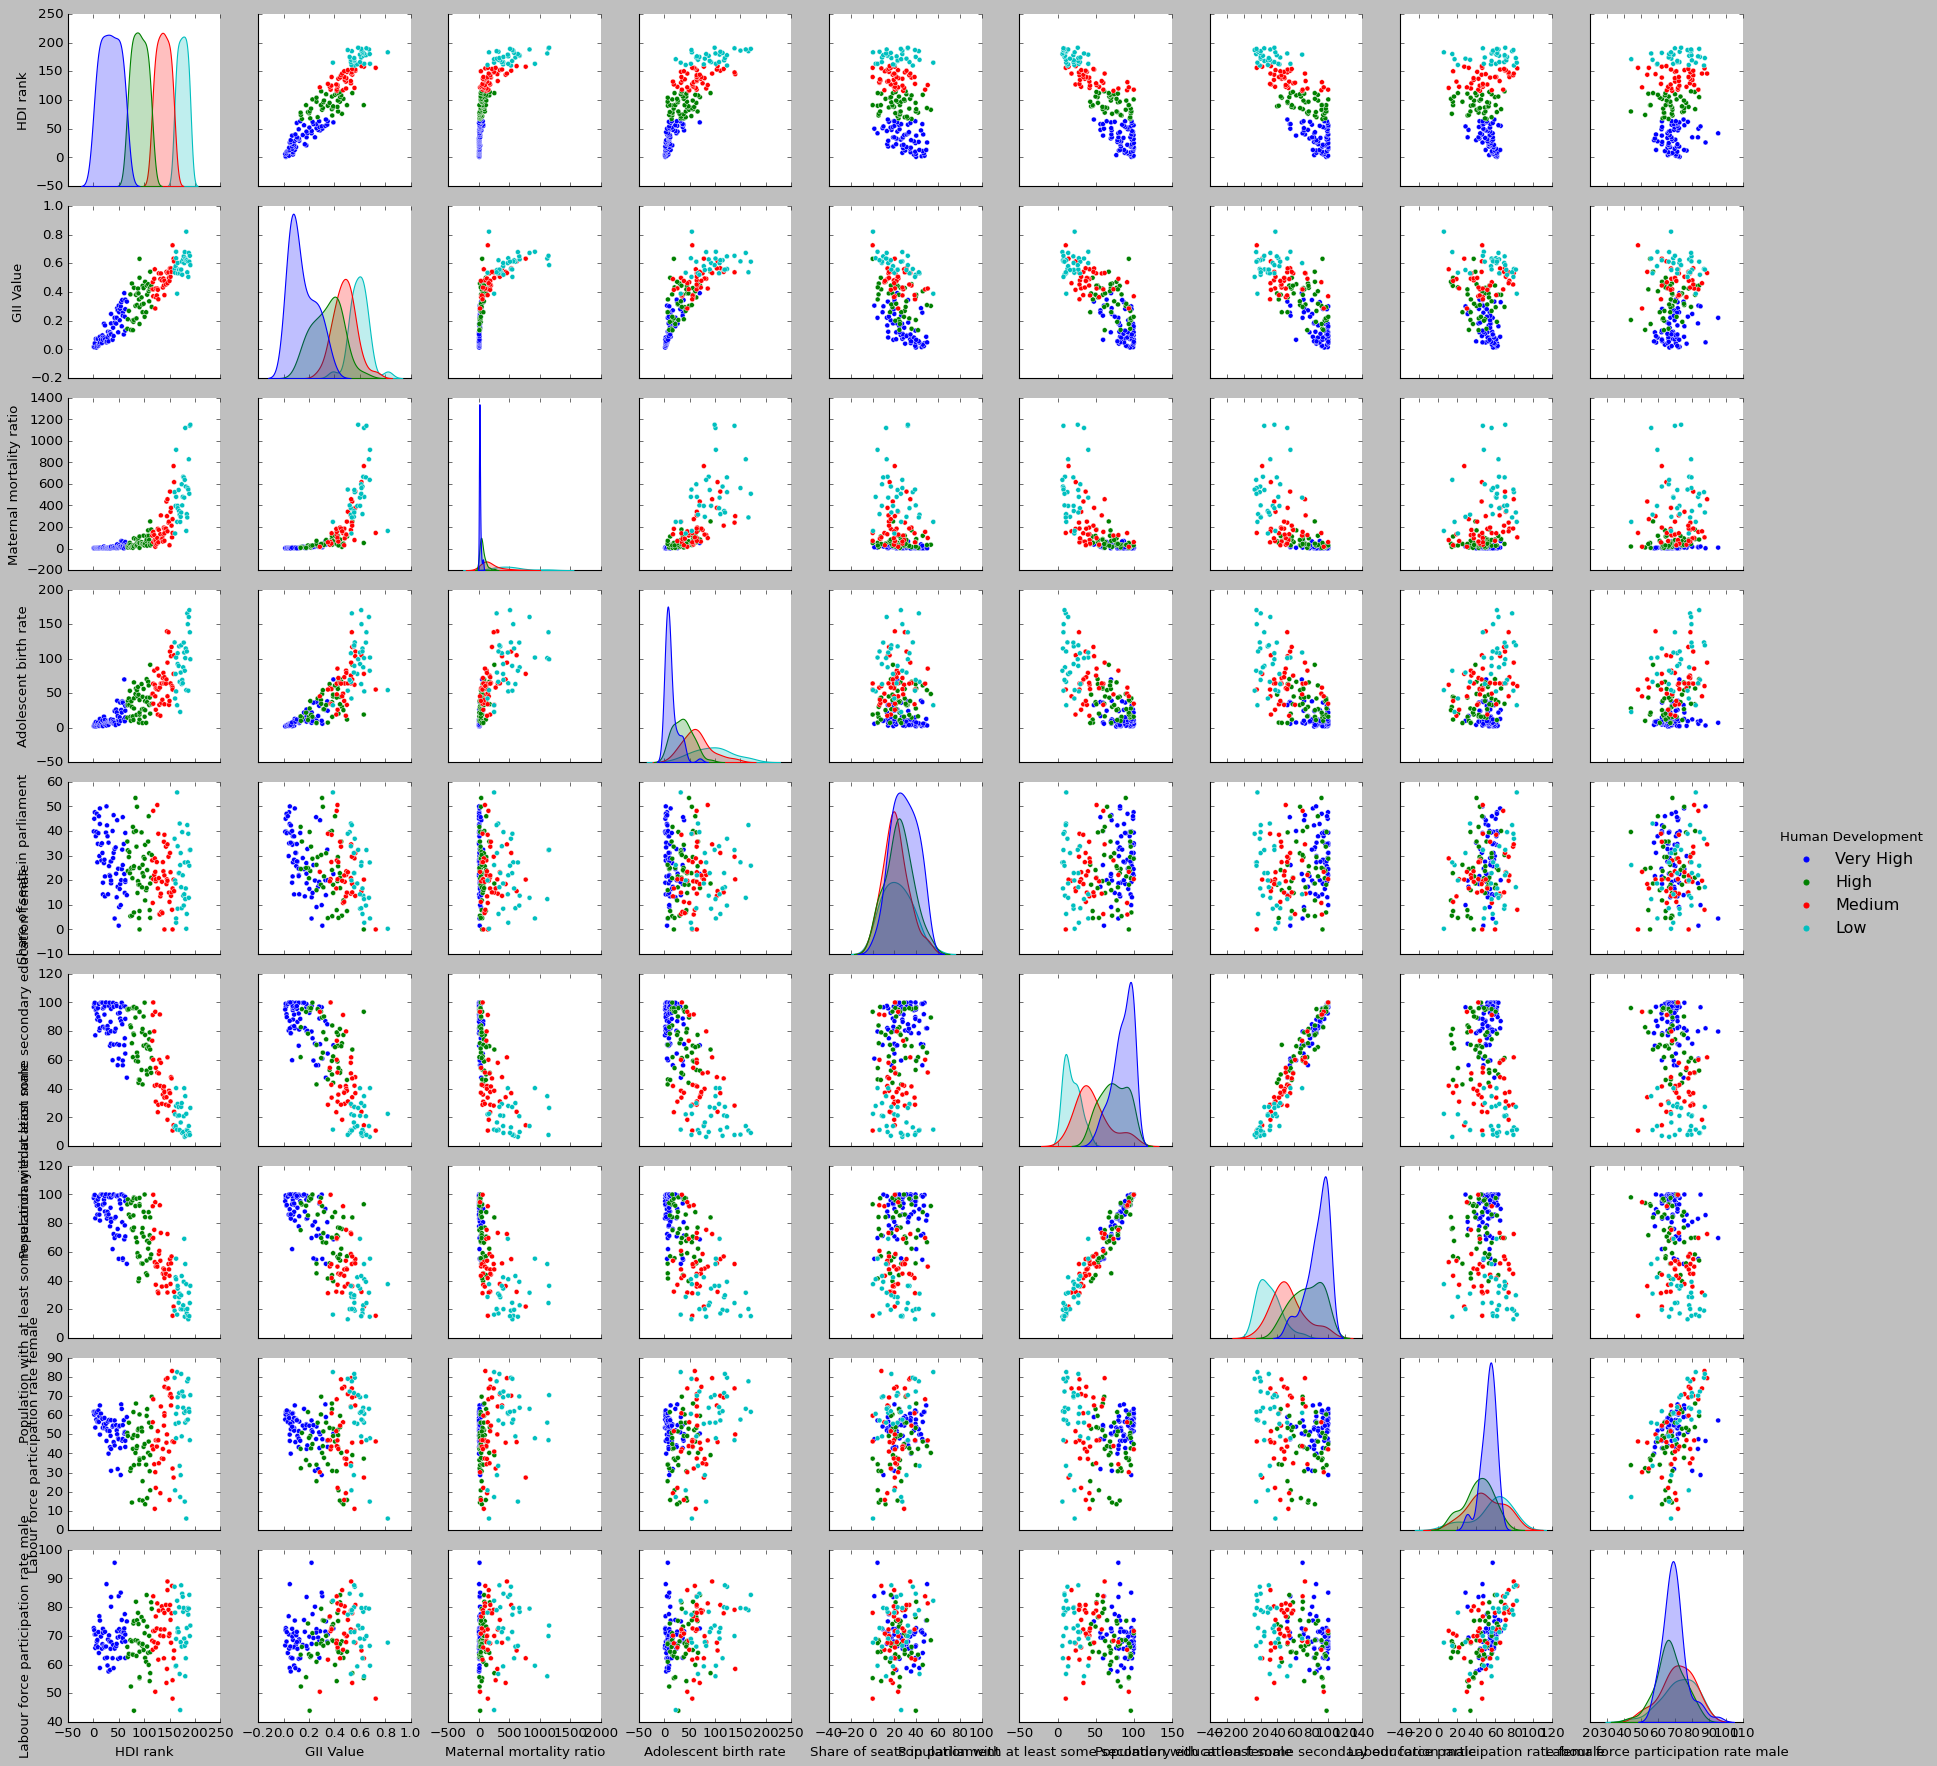

In [92]:
sns.pairplot(gi1,hue='Human Development')

From the GDI dataset, I want to explore the specific gap between male and female in development.

<Axes: >

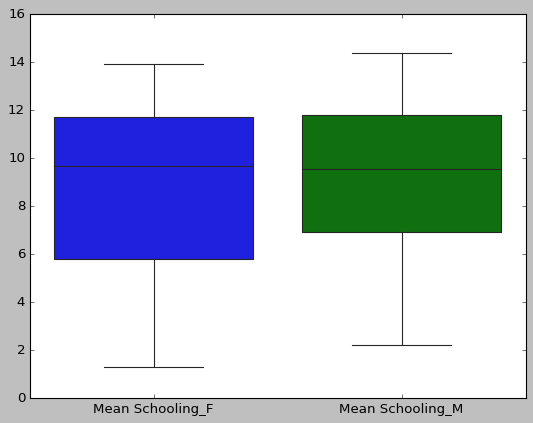

In [102]:
sns.boxplot(data=gd[["Mean Schooling_F", "Mean Schooling_M"]])

<Axes: >

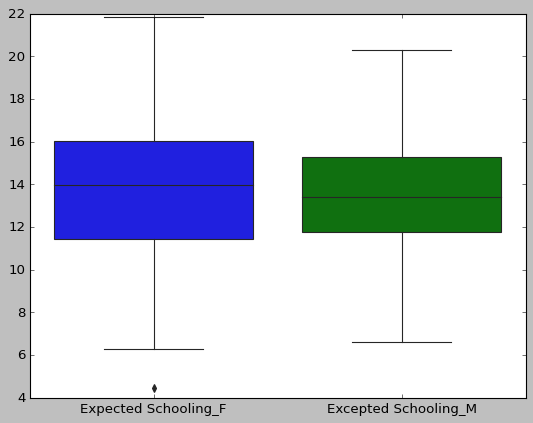

In [103]:
sns.boxplot(data=gd[["Expected Schooling_F", "Excepted Schooling_M"]])

<Axes: >

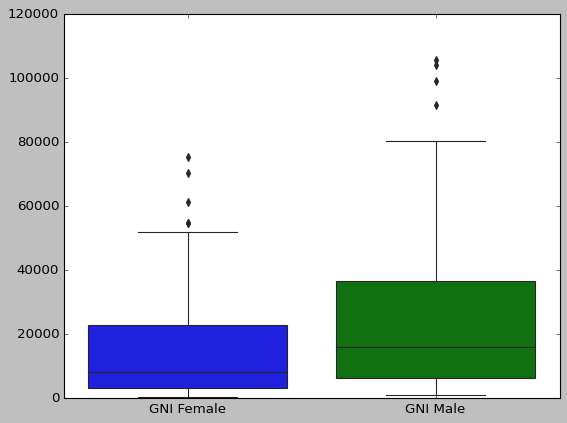

In [101]:
sns.boxplot(data=gd[["GNI Female", "GNI Male"]])

<Axes: >

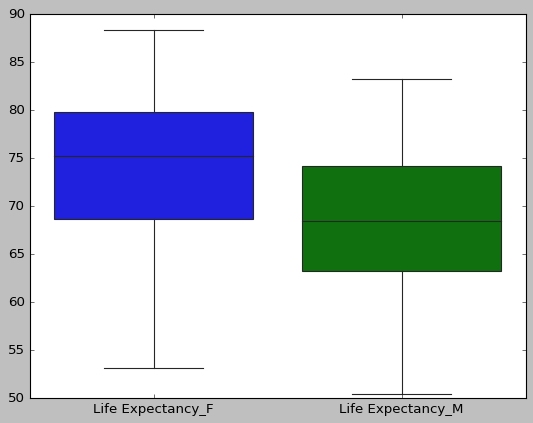

In [104]:
sns.boxplot(data=gd[["Life Expectancy_F", "Life Expectancy_M"]])